In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import tensorflow as tf




In [2]:
os.chdir('C:\\Users\\Zoidb\\Downloads')

data = pd.read_excel("Churn.xlsx")

In [3]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [4]:
#I want to count the number of 0 and 1 values to see how balanced the data is
data['Churn'].value_counts(normalize=True)
#The data is slightly imbalanced which we'll need to account for when modeling

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [5]:
data = data.drop(['customerID'],axis=1)
#don't need the ID variable

In [6]:
data.isnull().sum()
##Since there are only 11 NAs in Total Charges, dropping those rows wont significantly hinder the model

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
data = data.dropna(axis='rows')

In [8]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
#Seeing how many unique values are in each column
for col in data:
    print(data[col].unique())

['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
['No' 'Yes']


## Data Exploration Stage

In [10]:
##Creating a list of all continuous columns
continuous = [
    var for var in data.columns if var in ['TotalCharges','MonthlyCharges','tenure']
]

C:\Users\Zoidb\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Zoidb\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Zoidb\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

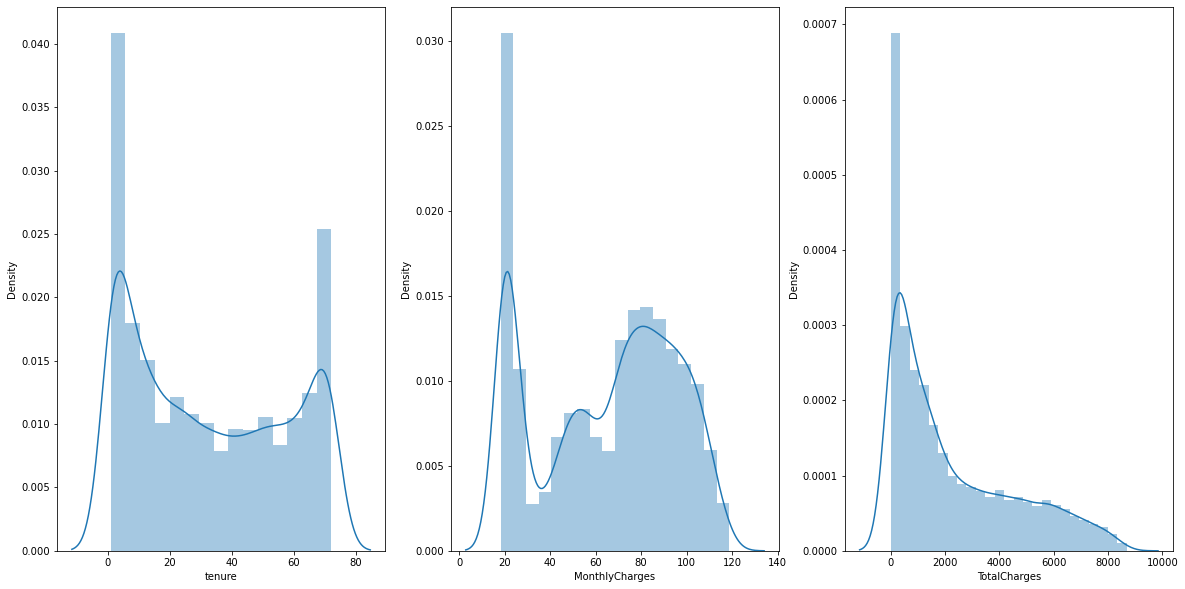

In [11]:
#Seeing the distributions of all continuous columns (I'll include tenure even though it could be discrete,
#I want to look at similar distributions for all 3 variables)
fig, axs = plt.subplots(ncols=3, nrows=1,figsize=(20,10))
axs = axs.flatten()

for i, var in enumerate(continuous):
    sns.distplot(data[data[var].notnull()][var], ax=axs[i]);
#None of these variables are normally distributed, so we'll need to standardize the data before feeding it into the model

C:\Users\Zoidb\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Zoidb\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Zoidb\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


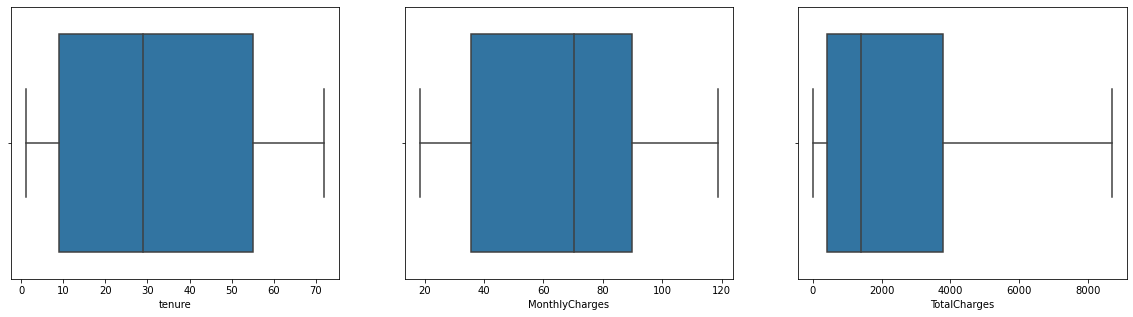

In [12]:
#In the same vein, checking for outliers in the continuous variables
fig, axs = plt.subplots(ncols=3, nrows=1,figsize=(20,5))
axs = axs.flatten()

for i, var in enumerate(continuous):
    sns.boxplot(data[data[var].notnull()][var], ax=axs[i], orient='h');
#There are no outliers in the data which is nice

## Data Pre-Processing Stage

In [13]:
##First I create the train/test.  

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Churn'], axis=1),
                                                    data['Churn'],
                                                    test_size=0.4,
                                                    random_state=0)

X_train.shape, X_test.shape
y_train



4043     No
471     Yes
4467     No
6047     No
3169     No
       ... 
4939     No
3269     No
1658    Yes
2612     No
2737     No
Name: Churn, Length: 4219, dtype: object

In [14]:
##I can create a data Pipeline to perform the pre-processing that I need to do

categorical = [
    var for var in data.columns if data[var].dtype == 'O'
    if var not in ['Churn']
]

##Creating list of binary categorical variables (Yes or No only and Gender)
binary_categorical = [var for var in data.columns if var in [ 'gender','Partner','Dependents','PhoneService','Paperless Billing','Churn']]
multiple_categorical = [var for var in data.columns if var in categorical
                        and var not in binary_categorical]

multiple_categorical

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [15]:
y_train.shape

(4219,)

In [16]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4043,Male,1,Yes,No,59,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),64.05,3886.85
471,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.00,55.00
4467,Female,0,Yes,No,48,Yes,Yes,DSL,No,No,Yes,Yes,No,Yes,One year,Yes,Mailed check,69.55,3435.60
6047,Male,0,Yes,No,13,Yes,Yes,DSL,Yes,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,65.85,902.25
3169,Male,0,Yes,Yes,52,Yes,No,DSL,No,Yes,Yes,Yes,Yes,No,One year,Yes,Electronic check,68.75,3482.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4939,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,18.90,18.90
3269,Male,0,No,No,65,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),24.80,1600.95
1658,Male,0,Yes,Yes,50,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),105.95,5341.80
2612,Female,0,Yes,Yes,14,Yes,Yes,DSL,No,Yes,No,Yes,Yes,Yes,Month-to-month,No,Credit card (automatic),80.45,1137.05


In [17]:
##I need to make the categorical values numeric without tricking the algorithm into thinking the data is ordinal
#(which could happen if label encoding was used). I create dummy variables (Ex: A "Male" column is created and if the original
#data was male the value would be 1, otherwise 0)
from sklearn import preprocessing



X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

#Now i'll One Hot encode the y values so that Yes=1 and No=0
le = preprocessing.LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

X_train

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4043,1,59,64.05,3886.85,0,1,0,1,1,0,...,1,0,0,1,0,1,0,1,0,0
471,0,1,55.00,55.00,0,1,1,0,1,0,...,1,1,0,0,0,1,0,0,1,0
4467,0,48,69.55,3435.60,1,0,0,1,1,0,...,1,0,1,0,0,1,0,0,0,1
6047,0,13,65.85,902.25,0,1,0,1,1,0,...,1,1,0,0,0,1,0,0,1,0
3169,0,52,68.75,3482.85,0,1,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4939,0,1,18.90,18.90,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
3269,0,65,24.80,1600.95,0,1,1,0,1,0,...,0,0,1,0,1,0,0,1,0,0
1658,0,50,105.95,5341.80,0,1,0,1,0,1,...,1,1,0,0,1,0,0,1,0,0
2612,0,14,80.45,1137.05,1,0,0,1,0,1,...,1,1,0,0,1,0,0,1,0,0


In [18]:
##Now I need to work on the distributions and getting them more towards a standard distribution
#The first thing i'll do is log transform the charges variables

from feature_engine.variable_transformers import LogTransformer
log = LogTransformer(variables = ['MonthlyCharges','TotalCharges'])
# fitting the transformer
log.fit(X_train)

# transforming the data
X_train= log.transform(X_train)
X_test= log.transform(X_test)

X_train


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4043,1,59,4.159664,8.265354,0,1,0,1,1,0,...,1,0,0,1,0,1,0,1,0,0
471,0,1,4.007333,4.007333,0,1,1,0,1,0,...,1,1,0,0,0,1,0,0,1,0
4467,0,48,4.242046,8.141947,1,0,0,1,1,0,...,1,0,1,0,0,1,0,0,0,1
6047,0,13,4.187379,6.804892,0,1,0,1,1,0,...,1,1,0,0,0,1,0,0,1,0
3169,0,52,4.230477,8.155606,0,1,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4939,0,1,2.939162,2.939162,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
3269,0,65,3.210844,7.378352,0,1,1,0,1,0,...,0,0,1,0,1,0,0,1,0,0
1658,0,50,4.662967,8.583318,0,1,0,1,0,1,...,1,1,0,0,1,0,0,1,0,0
2612,0,14,4.387636,7.036192,1,0,0,1,0,1,...,1,1,0,0,1,0,0,1,0,0


C:\Users\Zoidb\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Zoidb\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

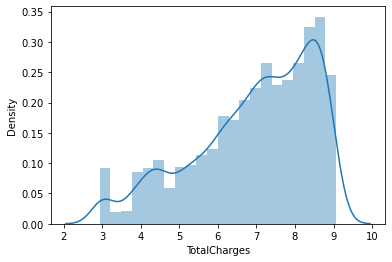

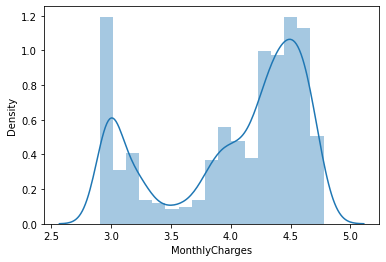

In [19]:
##I'll check the distributions to see if the transformation helped get a better distribution

plt.figure()             
sns.distplot(X_train['TotalCharges'])
    
plt.figure()
sns.distplot(X_train['MonthlyCharges'])

##The log transform helps a little but we still need to standardize a bit more

In [20]:
#Lastly, I will normalize the data using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)





In [21]:
y_train

array([0, 1, 0, ..., 1, 0, 0])

## Implementing the Keras Model

In [22]:
##I switch to Theano backend in order to try and speed up the gridsearchcv process I use below
import os 
os.environ['KERAS_BACKEND'] = 'theano'
import keras
from keras.models import Sequential
from keras.layers import InputLayer
from keras.layers import Dense
from keras.layers import Dropout
from keras.constraints import maxnorm



In [23]:

##Creating the sequential model as a base
model = Sequential() 
##Creating the Dense Input layer
##16 is the number of nodes, activation is the equation that determines the output layer (relu is the most common)
##And kernel_constraint=maxnorm will scale the weights used and works well with dropout layers
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu', kernel_constraint=maxnorm(3)))
##Adding a dropout layer to drop some of the data each iteration. This helps prevent overfitting
model.add(Dropout(rate=0.2))
##Next adding hidden layers, which will nonlinearly transform the date from the input to the output
model.add(Dense(16, activation='relu', kernel_constraint=maxnorm(3)))
##Adding a dropout layer for each hidden layer
model.add(Dropout(rate=0.2))
model.add(Dense(8, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(rate=0.2))
##Adding the output layer. Since this is a binary classification problem we'll use the sigmoid activation, and we want
##the output to be 1 value showing whether the customer churned or not (hence the 1 value)
model.add(Dense(1, activation='sigmoid'))

##Lastly the model needs to be told how to run (compiling the model). First we tell it which optimizer to use in the tranformations
##I use Adam which works well for binary classification problems. Next we specify the loss function, and since the problem
##is binary i'll use binary_crossentropy, and lastly the metric i'll be using to judge the model is accuracy
model.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics=['accuracy'])

In [24]:
##Fitting the model to our data


history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=10)

Epoch 1/20
422/422 [==============================] - 2s 6ms/step - loss: 0.5484 - accuracy: 0.7130 - val_loss: 0.4359 - val_accuracy: 0.7810
Epoch 2/20
422/422 [==============================] - 2s 5ms/step - loss: 0.4663 - accuracy: 0.7701 - val_loss: 0.4289 - val_accuracy: 0.7821
Epoch 3/20
422/422 [==============================] - 2s 5ms/step - loss: 0.4581 - accuracy: 0.7850 - val_loss: 0.4240 - val_accuracy: 0.7974
Epoch 4/20
422/422 [==============================] - 1s 3ms/step - loss: 0.4513 - accuracy: 0.7836 - val_loss: 0.4204 - val_accuracy: 0.8006
Epoch 5/20
422/422 [==============================] - 1s 3ms/step - loss: 0.4399 - accuracy: 0.7981 - val_loss: 0.4187 - val_accuracy: 0.7931
Epoch 6/20
422/422 [==============================] - 1s 3ms/step - loss: 0.4399 - accuracy: 0.7914 - val_loss: 0.4213 - val_accuracy: 0.7963
Epoch 7/20
422/422 [==============================] - 2s 4ms/step - loss: 0.4398 - accuracy: 0.7928 - val_loss: 0.4182 - val_accuracy: 0.8013
Epoch 

In [25]:
##We can print the confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_pred=model.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)


[[1900  161]
 [ 404  348]]


0.7991468183434056

In [26]:
X_test

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.061869,0.013600,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.211268,0.060569,0.466306,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.000000,0.039327,0.006735,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.000000,0.148051,0.039843,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.000000,0.749251,0.222916,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2808,0.0,0.563380,0.061869,0.617815,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2809,1.0,0.507042,0.733525,0.801726,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2810,0.0,0.394366,0.838063,0.804635,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2811,0.0,0.718310,0.645822,0.835622,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [27]:
##Next I want to tune the hyperparameters to really try and get the best model possible. I prefer using
##GridsearchCV so i'll nead to create a function that builds and returns the above model, and then use KerasClassifier to
##use sci-kit learn's GridsearchCV. I want to tune the and the dropout rate, weight constraints, and learning rate and momentum


from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from joblib import Parallel

def create_model(dropout_rate=0.0, weight_constraint=0,learn_rate=0.01, momentum=0):
    model = Sequential() 
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(rate=0.2))
    model.add(Dense(16, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(rate=0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics=['accuracy'])
    return model
 
model = KerasClassifier(build_fn=create_model, epochs=10, dropout_rate=0.2)
##The parameter grids
weight_constraint = [1, 2, 3, 4, 5]
learn_rate = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5]
momentum = [0.0, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8]
dropout_rate = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]


param_grid = dict(dropout_rate=dropout_rate,learn_rate=learn_rate,momentum=momentum,weight_constraint=weight_constraint)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=2, verbose=3)
grid_result = grid.fit(X_train, y_train)

# summarizing results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 2 folds for each of 1260 candidates, totalling 2520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  7.4min
C:\Users\Zoidb\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed: 28.7min
[Parallel(n_jobs=-1)]: Done 2520 out of 2520 | elapsed: 33.1min finished


Epoch 1/10
132/132 [==============================] - 0s 668us/step - loss: 0.5420 - accuracy: 0.7220
Epoch 2/10
132/132 [==============================] - 0s 700us/step - loss: 0.4638 - accuracy: 0.7741
Epoch 3/10
132/132 [==============================] - 0s 554us/step - loss: 0.4556 - accuracy: 0.7796
Epoch 4/10
132/132 [==============================] - ETA: 0s - loss: 0.4516 - accuracy: 0.78 - 0s 759us/step - loss: 0.4450 - accuracy: 0.7912
Epoch 5/10
132/132 [==============================] - 0s 641us/step - loss: 0.4403 - accuracy: 0.7879
Epoch 6/10
132/132 [==============================] - 0s 640us/step - loss: 0.4385 - accuracy: 0.7879
Epoch 7/10
132/132 [==============================] - 0s 641us/step - loss: 0.4306 - accuracy: 0.7978
Epoch 8/10
132/132 [==============================] - 0s 592us/step - loss: 0.4259 - accuracy: 0.7969
Epoch 9/10
132/132 [==============================] - 0s 641us/step - loss: 0.4255 - accuracy: 0.7959
Epoch 10/10
132/132 [===================

0.790947 (0.005639) with: {'dropout_rate': 0.6, 'learn_rate': 0.1, 'momentum': 0.7, 'weight_constraint': 2}
0.794977 (0.007299) with: {'dropout_rate': 0.6, 'learn_rate': 0.1, 'momentum': 0.7, 'weight_constraint': 3}
0.794029 (0.007773) with: {'dropout_rate': 0.6, 'learn_rate': 0.1, 'momentum': 0.7, 'weight_constraint': 4}
0.795451 (0.006351) with: {'dropout_rate': 0.6, 'learn_rate': 0.1, 'momentum': 0.7, 'weight_constraint': 5}
0.795688 (0.008958) with: {'dropout_rate': 0.6, 'learn_rate': 0.1, 'momentum': 0.8, 'weight_constraint': 1}
0.798532 (0.007063) with: {'dropout_rate': 0.6, 'learn_rate': 0.1, 'momentum': 0.8, 'weight_constraint': 2}
0.792606 (0.004928) with: {'dropout_rate': 0.6, 'learn_rate': 0.1, 'momentum': 0.8, 'weight_constraint': 3}
0.795924 (0.004929) with: {'dropout_rate': 0.6, 'learn_rate': 0.1, 'momentum': 0.8, 'weight_constraint': 4}
0.795450 (0.003981) with: {'dropout_rate': 0.6, 'learn_rate': 0.1, 'momentum': 0.8, 'weight_constraint': 5}
0.794029 (0.008247) with: {'

In [28]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print ("%f (%f) with: %r" % (mean, stdev, param))
    

##It should be noted that the best score shows the parameters that worked best ONLY on the training set. So those may not
##necessarily be the best on the test set (or on other data sets). I'll go ahead and run the model with those parameters on 
##the test set to see what happens.


Best: 0.803510 using {'dropout_rate': 0.5, 'learn_rate': 0.01, 'momentum': 0.4, 'weight_constraint': 1}
0.794977 (0.005877) with: {'dropout_rate': 0.3, 'learn_rate': 0.01, 'momentum': 0.0, 'weight_constraint': 1}
0.794266 (0.007062) with: {'dropout_rate': 0.3, 'learn_rate': 0.01, 'momentum': 0.0, 'weight_constraint': 2}
0.795213 (0.005640) with: {'dropout_rate': 0.3, 'learn_rate': 0.01, 'momentum': 0.0, 'weight_constraint': 3}
0.794503 (0.007299) with: {'dropout_rate': 0.3, 'learn_rate': 0.01, 'momentum': 0.0, 'weight_constraint': 4}
0.798295 (0.007774) with: {'dropout_rate': 0.3, 'learn_rate': 0.01, 'momentum': 0.0, 'weight_constraint': 5}
0.797584 (0.008011) with: {'dropout_rate': 0.3, 'learn_rate': 0.01, 'momentum': 0.2, 'weight_constraint': 1}
0.795687 (0.005166) with: {'dropout_rate': 0.3, 'learn_rate': 0.01, 'momentum': 0.2, 'weight_constraint': 2}
0.789999 (0.003743) with: {'dropout_rate': 0.3, 'learn_rate': 0.01, 'momentum': 0.2, 'weight_constraint': 3}
0.796161 (0.005166) with

0.795214 (0.007536) with: {'dropout_rate': 0.5, 'learn_rate': 0.3, 'momentum': 0.0, 'weight_constraint': 2}
0.795924 (0.003981) with: {'dropout_rate': 0.5, 'learn_rate': 0.3, 'momentum': 0.0, 'weight_constraint': 3}
0.792844 (0.008010) with: {'dropout_rate': 0.5, 'learn_rate': 0.3, 'momentum': 0.0, 'weight_constraint': 4}
0.792607 (0.007299) with: {'dropout_rate': 0.5, 'learn_rate': 0.3, 'momentum': 0.0, 'weight_constraint': 5}
0.798532 (0.008011) with: {'dropout_rate': 0.5, 'learn_rate': 0.3, 'momentum': 0.2, 'weight_constraint': 1}
0.797347 (0.005878) with: {'dropout_rate': 0.5, 'learn_rate': 0.3, 'momentum': 0.2, 'weight_constraint': 2}
0.795689 (0.010381) with: {'dropout_rate': 0.5, 'learn_rate': 0.3, 'momentum': 0.2, 'weight_constraint': 3}
0.793792 (0.008484) with: {'dropout_rate': 0.5, 'learn_rate': 0.3, 'momentum': 0.2, 'weight_constraint': 4}
0.798295 (0.008722) with: {'dropout_rate': 0.5, 'learn_rate': 0.3, 'momentum': 0.2, 'weight_constraint': 5}
0.792133 (0.009669) with: {'

In [29]:
##Predicting using the best parameters found by Gridsearch (again its only the best on the training set)

y_pred=grid.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

##While the accuracy score is slightly higher than it was previously, it should again be mentioned that these parameters are what will 
##perform the best on new data over time (not just the training set we already had.)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[[1906  155]
 [ 425  327]]


0.7938144329896907